In [2]:
import zipfile
import os
import pandas as pd

# Path to the zip file containing the dataset
zip_file_path = "/content/individual+household+electric+power+consumption.zip"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the current working directory
    zip_ref.extractall()


In [3]:
# Specify the filename of the extracted CSV file
csv_file_name = "household_power_consumption.txt"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_name, sep=';',
                 parse_dates={'DateTime': ['Date', 'Time']},
                 infer_datetime_format=True,
                 index_col='DateTime')

# Display the first few rows of the DataFrame
df.head()


<ipython-input-3-16de0405fae3>:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_name, sep=';',


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [5]:
# Convert object columns to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Check the data types and non-null counts again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None


In [6]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
df.shape

(2075259, 7)

In [8]:
# null check
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
#In order to fill the missing values we need see if their are any outliers or not
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
# Fill missing values with the mean of each column
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)

In [11]:
# null check
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

            Global_active_power  Global_reactive_power     Voltage  \
DateTime                                                             
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
DateTime                                                                      
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361       

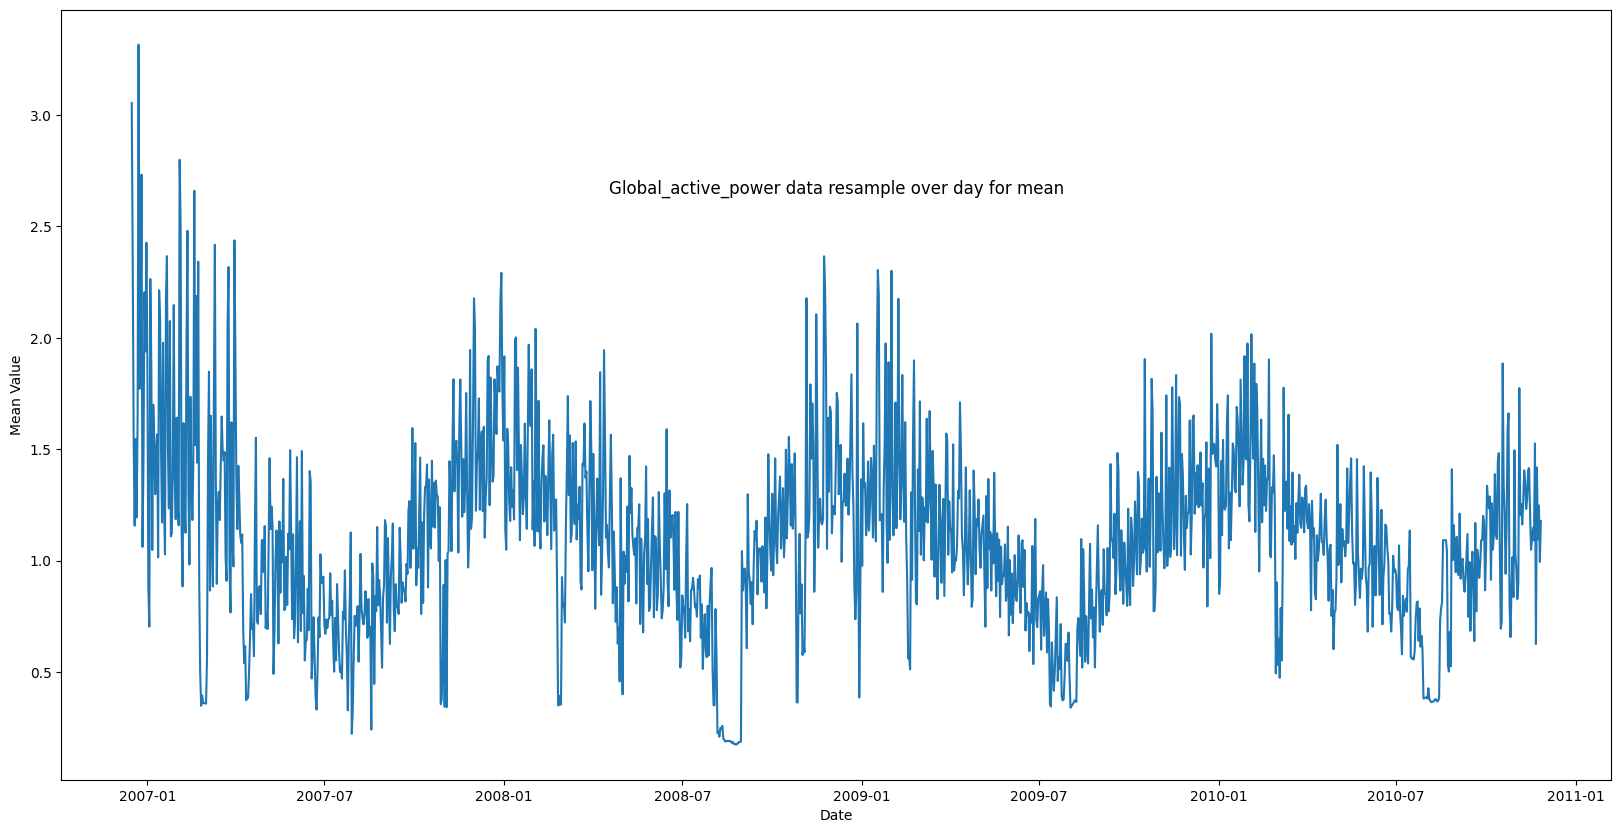

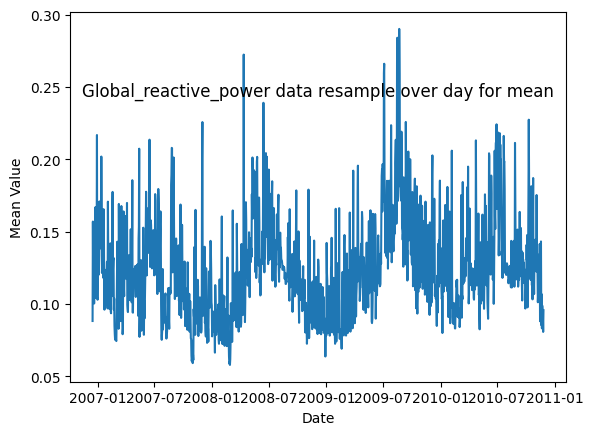

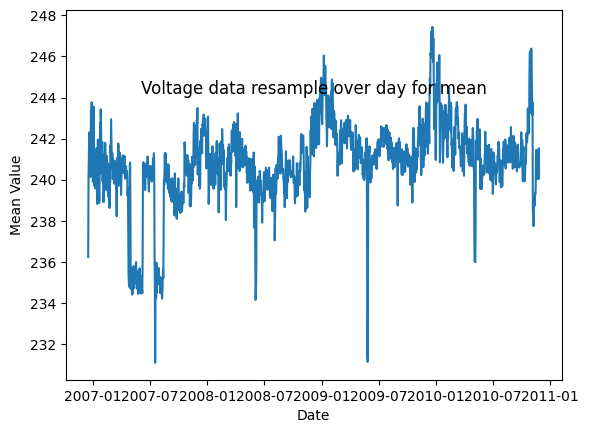

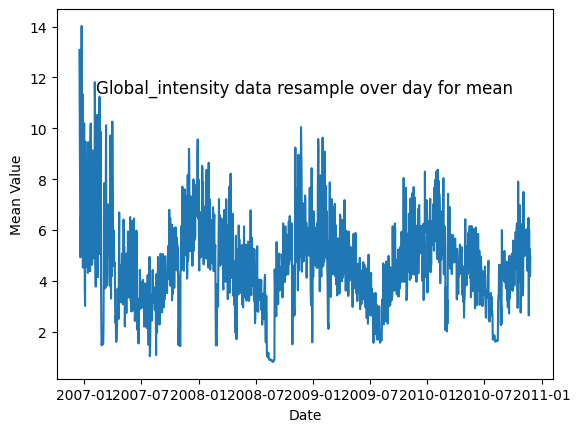

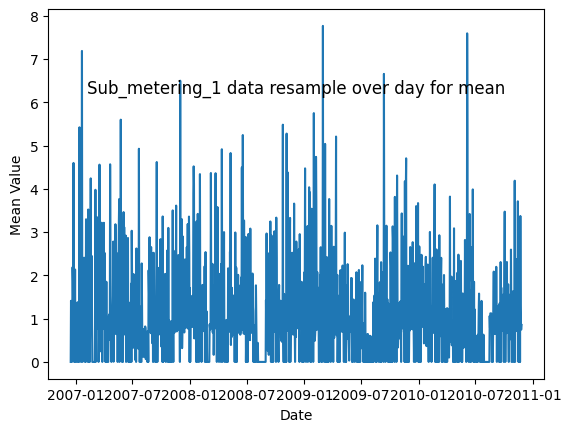

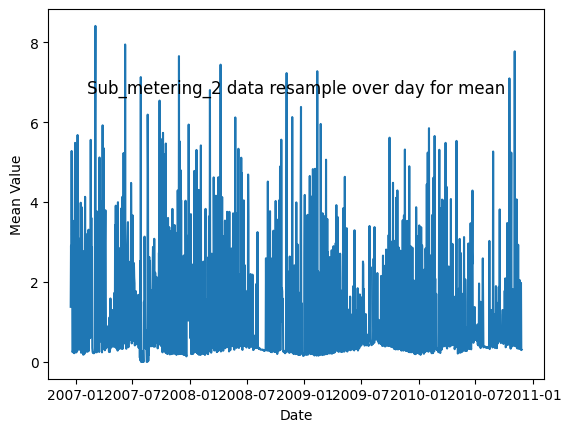

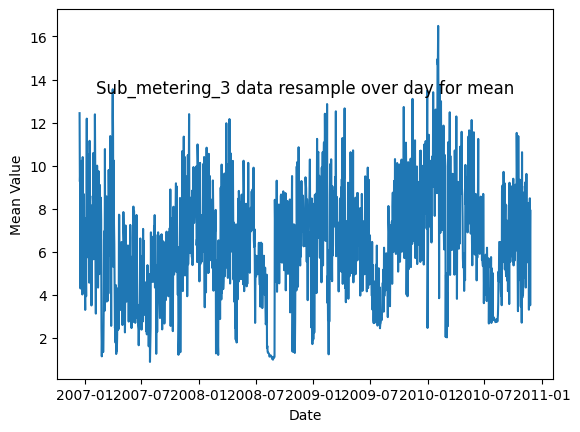

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the resampled DataFrame
resampled_df = df.resample('D').mean()
print(resampled_df.head())

plt.figure(figsize=(20, 10))
for col in resampled_df.columns:
    plt.plot(resampled_df[col])
    plt.title(col + ' data resample over day for mean', y=0.75, loc='center')
    plt.xlabel('Date')
    plt.ylabel('Mean Value')
    plt.show()


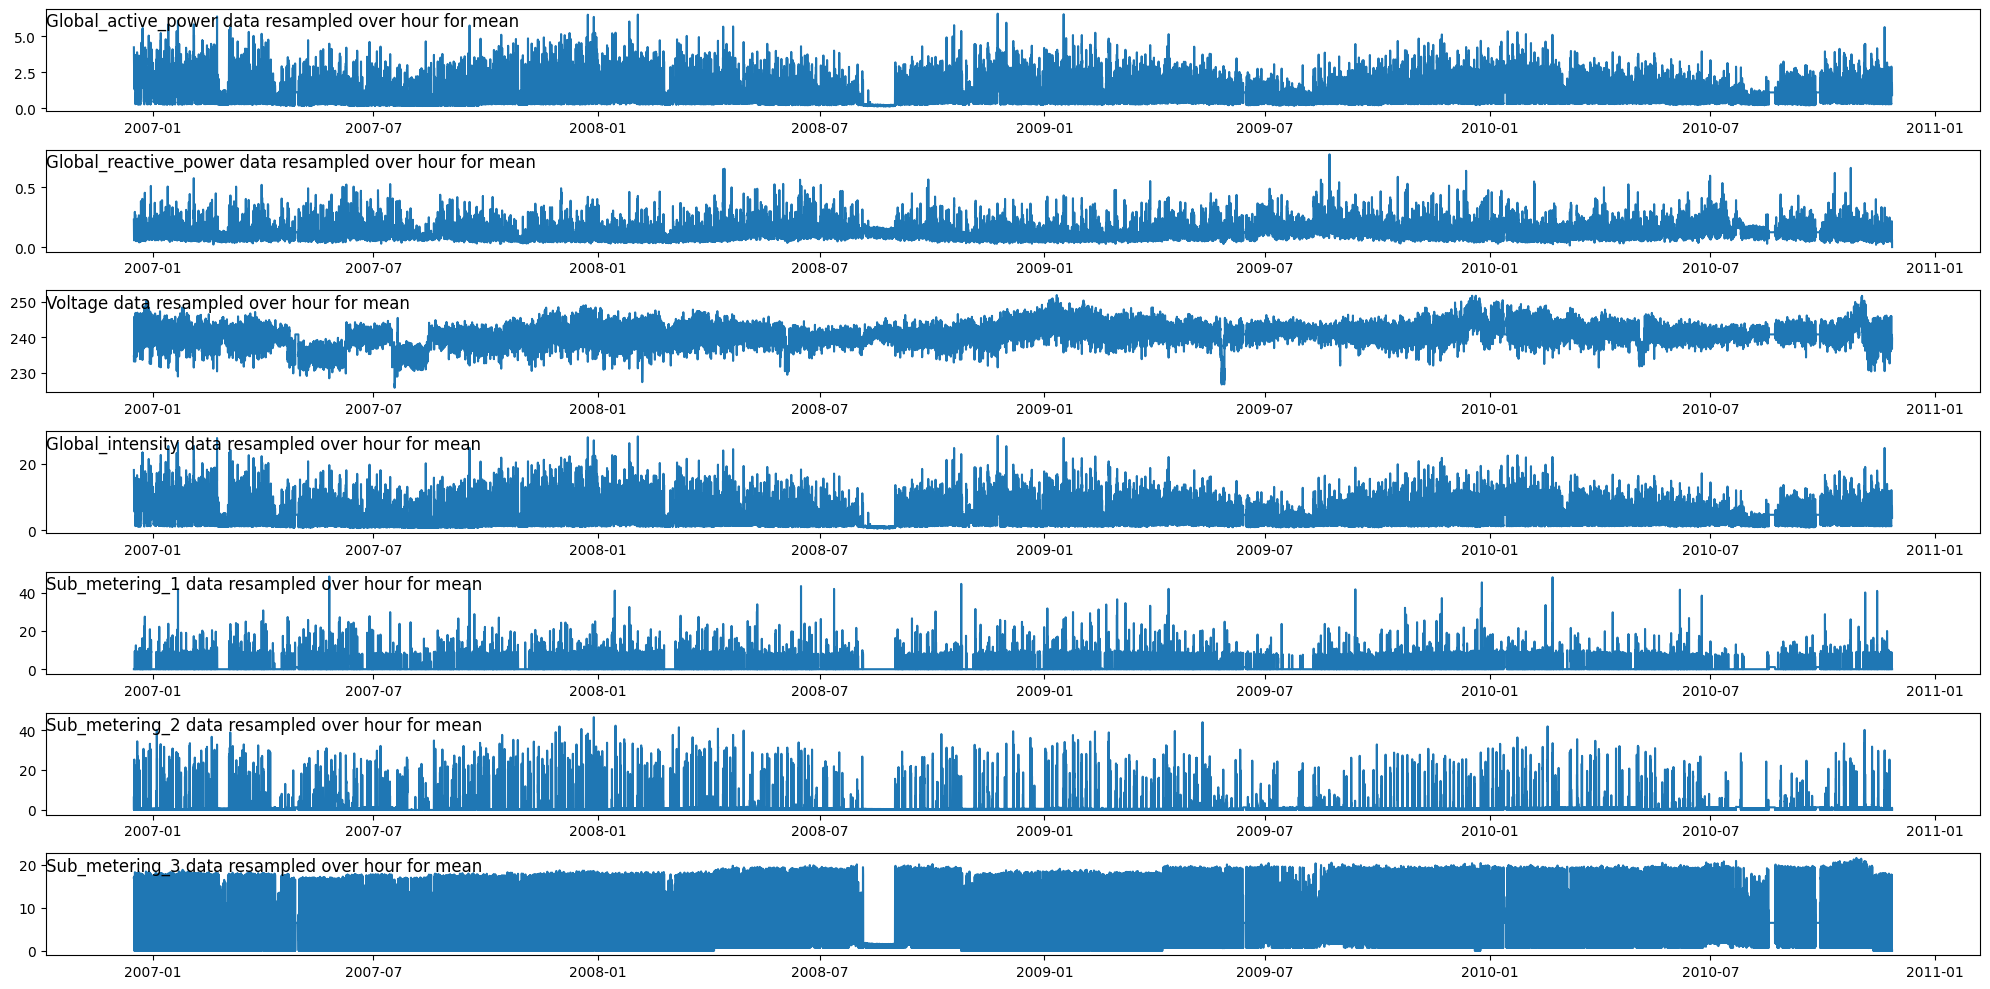

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resample the DataFrame by hour and calculate the mean
resampled_df = df.resample('H').mean()

# Get the number of columns in the resampled DataFrame
num_cols = resampled_df.shape[1]

plt.figure(figsize=(20, 10))
for col in range(num_cols):
    plt.subplot(num_cols, 1, col+1)
    plt.plot(resampled_df.iloc[:, col])
    plt.title(resampled_df.columns[col] + ' data resampled over hour for mean', y=0.75, loc='left')
plt.tight_layout()
plt.show()

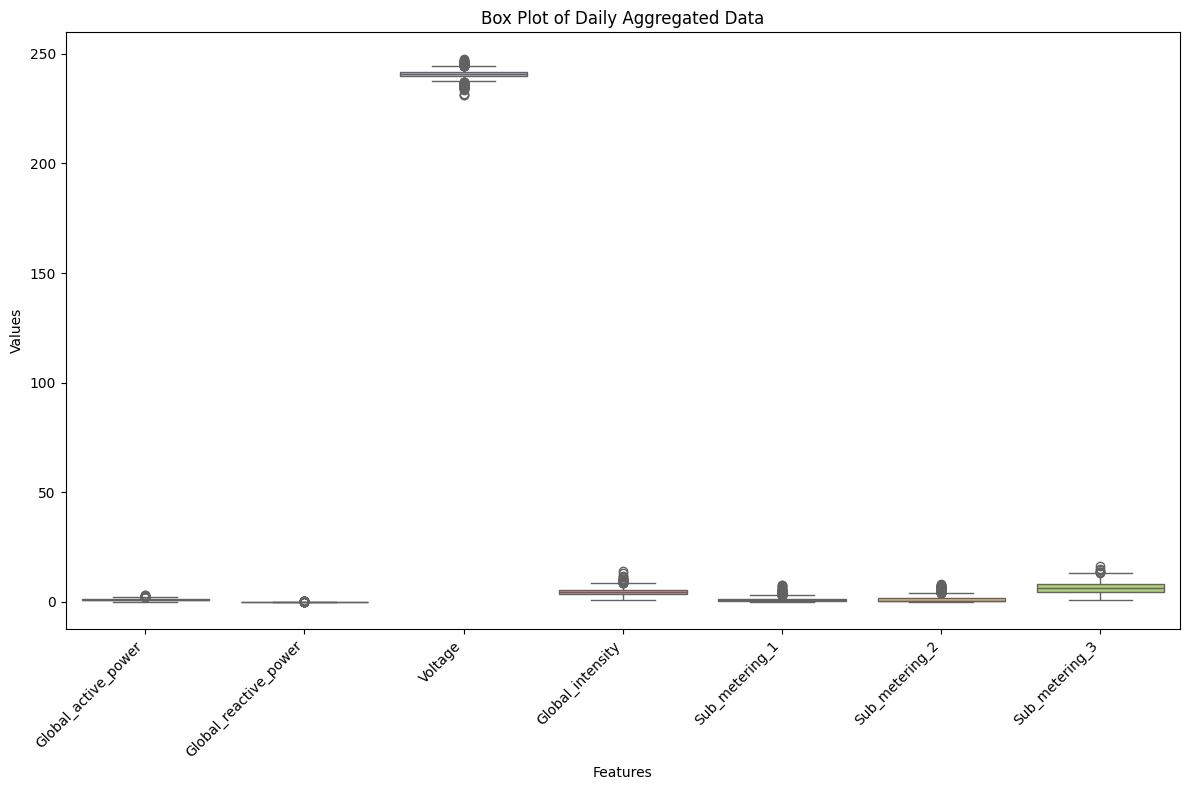

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resample the DataFrame by day and calculate the mean
resampled_df = df.resample('D').mean()

# Create a box plot of the daily aggregated data
plt.figure(figsize=(12, 8))
sns.boxplot(data=resampled_df, palette='Set3')
plt.title('Box Plot of Daily Aggregated Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [15]:
def series_to_supervised(df, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(df) is list else df.shape[1]
    dff = pd.DataFrame(df)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [16]:
df_resampled = df.resample('h').mean()
df_resampled.shape

(34589, 7)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_resampled)

df_scaled =pd.DataFrame(scaled)

df_scaled

,0,1,2,3,4,5,6
0,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418
1,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
2,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
3,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
4,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917
...,...,...,...,...,...,...,...
34584,0.248876,0.079294,0.431003,0.240794,0.0,0.000000,0.597061
34585,0.225194,0.069350,0.448732,0.219393,0.0,0.000000,0.000000
34586,0.238534,0.077529,0.418395,0.235055,0.0,0.001436,0.000000
34587,0.161531,0.078993,0.520246,0.158178,0.0,0.022972,0.000000


In [18]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)

In [19]:
reframed=reframed.rename(columns = {'var1(t)': 'target'}, inplace = False)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),target
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597


In [20]:
# Extract feature columns (X) and target column (y)
X = reframed.drop(columns=['target'])  # Drop the 'target' column to get features
y = reframed['target']  # Select only the 'target' column for the target variable

In [21]:
X.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723


In [22]:
y.head()

0    0.636816
1    0.545045
2    0.509006
3    0.488550
4    0.455597
Name: target, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False, random_state=42)

# Reshape the data for RNN input
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the shapes of the data
print("Train shapes:")
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("Validation shapes:")
print("X_val.shape:", X_val.shape)
print("y_val.shape:", y_val.shape)
print("Test shapes:")
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


Train shapes:
X_train.shape: (24903, 1, 7)
y_train.shape: (24903,)
Validation shapes:
X_val.shape: (2767, 1, 7)
y_val.shape: (2767,)
Test shapes:
X_test.shape: (6918, 1, 7)
y_test.shape: (6918,)


In [27]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert pandas DataFrames or Series to NumPy arrays if needed
X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
X_val_array = X_val.values if isinstance(X_val, pd.DataFrame) else X_val
y_val_array = y_val.values if isinstance(y_val, pd.Series) else y_val

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_array, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_array, dtype=torch.float32)

batch_size = 64

# Create a training dataset and dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create a validation dataset and dataloader
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Print the shapes of the data
print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))


Train dataset size: 24903
Validation dataset size: 2767


In [29]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert pandas DataFrames or Series to NumPy arrays if needed
X_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# Convert NumPy arrays to PyTorch tensors
X_test_tensor = torch.tensor(X_test_array, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_array, dtype=torch.float32)

batch_size = 64

# Create a test dataset and dataloader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the shapes of the data
print("Test dataset size:", len(test_dataset))


Test dataset size: 6918


In [25]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define the LSTM layers
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.lstm3 = nn.LSTM(hidden_size * 2, 32, num_layers=num_layers, batch_first=True, bidirectional=True)

        # Define the fully connected layers
        self.fc1 = nn.Linear(32 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

        # Define the activation and dropout layers
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        # Forward pass through LSTM layers
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out, _ = self.lstm3(out)

        # Reshape the output for fully connected layers
        out = out[:, -1, :]  # Select the output of the last time step

        # Forward pass through fully connected layers
        out = self.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.relu(self.fc2(out))
        out = self.dropout(out)
        out = self.relu(self.fc3(out))
        out = self.dropout(out)
        out = self.fc4(out)

        return torch.sigmoid(out)

# Initialize the model
input_size = X_train_tensor.shape[2]
hidden_size = 128
num_layers = 1
model = RNN(input_size, hidden_size, num_layers)
print(model)


RNN(
  (lstm1): LSTM(7, 128, batch_first=True, bidirectional=True)
  (lstm2): LSTM(256, 128, batch_first=True, bidirectional=True)
  (lstm3): LSTM(256, 32, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
)


<ipython-input-28-967386fd70cd>:52: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  running_mae += F.l1_loss(outputs, labels).item()
<ipython-input-28-967386fd70cd>:52: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  running_mae += F.l1_loss(outputs, labels).item()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
<ipython-input-28-967386fd70cd>:62: UserWarning: Using a

Epoch [1/150], Loss: 0.1169, Val Loss: 0.1278, Val MAE: 0.1278
Epoch [2/150], Loss: 0.1112, Val Loss: 0.1281, Val MAE: 0.1281
Epoch [3/150], Loss: 0.1111, Val Loss: 0.1293, Val MAE: 0.1293
Epoch [4/150], Loss: 0.1113, Val Loss: 0.1272, Val MAE: 0.1272
Epoch [5/150], Loss: 0.1113, Val Loss: 0.1303, Val MAE: 0.1303
Epoch [6/150], Loss: 0.1111, Val Loss: 0.1279, Val MAE: 0.1279
Epoch [7/150], Loss: 0.1113, Val Loss: 0.1290, Val MAE: 0.1290
Epoch [8/150], Loss: 0.1111, Val Loss: 0.1291, Val MAE: 0.1291
Epoch [9/150], Loss: 0.1111, Val Loss: 0.1288, Val MAE: 0.1288
Epoch [10/150], Loss: 0.1111, Val Loss: 0.1271, Val MAE: 0.1271
Epoch [11/150], Loss: 0.1111, Val Loss: 0.1275, Val MAE: 0.1275
Epoch [12/150], Loss: 0.1113, Val Loss: 0.1275, Val MAE: 0.1275
Epoch [13/150], Loss: 0.1111, Val Loss: 0.1260, Val MAE: 0.1260
Epoch [14/150], Loss: 0.1111, Val Loss: 0.1289, Val MAE: 0.1289
Epoch [15/150], Loss: 0.1113, Val Loss: 0.1282, Val MAE: 0.1282
Epoch [16/150], Loss: 0.1113, Val Loss: 0.1294, V

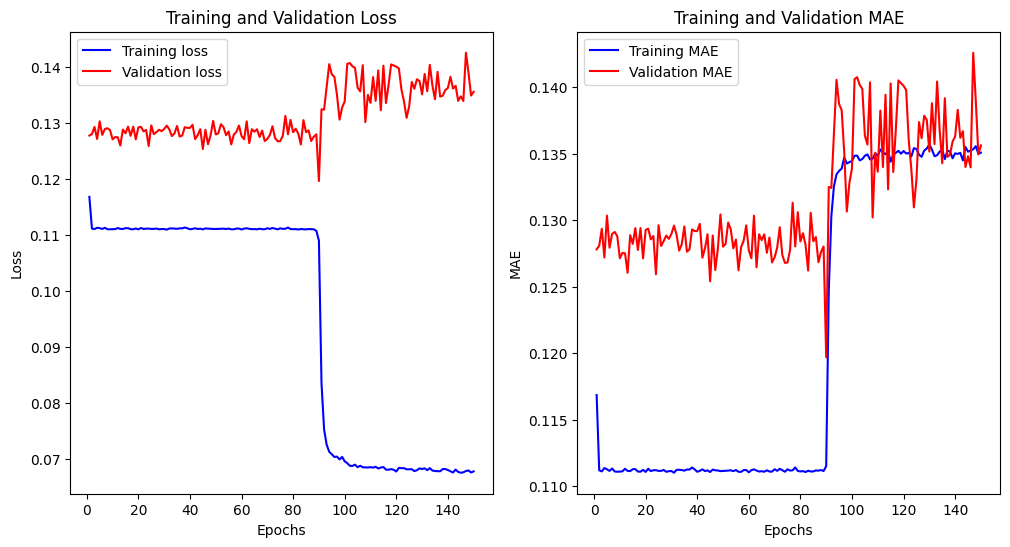

In [28]:
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Lists to store loss and MAE values
train_losses = []
val_losses = []
train_maes = []
val_maes = []

# Define the loss function and optimizer
criterion = nn.L1Loss()  # Define the loss function as MAE
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Callback
class MyCallback:
    def __init__(self):
        self.best_mae = float('inf')  # Initialize best MAE with infinity

    def on_epoch_end(self, epoch, mae, val_mae):
        if mae < 0.1 and val_mae < 0.1:
            print("\nMAE of the model < 10% of data scale")
            return True  # Stop training
        else:
            return False

callbacks = MyCallback()

import time
time_array = []

start_time = time.time()

# Training loop
for epoch in range(150):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    running_mae = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_mae += F.l1_loss(outputs, labels).item()

    # Compute MAE on validation set
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_mae = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            val_mae += F.l1_loss(outputs, labels).item()

    # Calculate average loss and MAE
    running_loss /= len(train_loader)
    running_mae /= len(train_loader)
    val_loss /= len(val_loader)
    val_mae /= len(val_loader)

    # Append values to lists for plotting
    train_losses.append(running_loss)
    val_losses.append(val_loss)
    train_maes.append(running_mae)
    val_maes.append(val_mae)

    # Check if training should stop based on callback
    if callbacks.on_epoch_end(epoch, running_loss, val_loss):
        break

    print(f"Epoch [{epoch+1}/150], Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

# Plotting
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_maes, 'b', label='Training MAE')
plt.plot(epochs, val_maes, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


<ipython-input-34-d969a49279ef>:54: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  running_mae += F.l1_loss(outputs, labels).item()
<ipython-input-34-d969a49279ef>:54: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  running_mae += F.l1_loss(outputs, labels).item()
<ipython-input-34-d969a49279ef>:64: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  val_mae += F.l1_loss(outputs, labels).item()
<ipython-input-34-d969a49279ef>:64: UserWarning: Using a target size (torch.Size([15])) that is differe

Epoch [1/150], Loss: 0.0651, Val Loss: 0.1419, Test Loss: 0.1034, Val MAE: 0.1419, Test MAE: 0.1034
Epoch [2/150], Loss: 0.0655, Val Loss: 0.1337, Test Loss: 0.0966, Val MAE: 0.1337, Test MAE: 0.0966
Epoch [3/150], Loss: 0.0653, Val Loss: 0.1334, Test Loss: 0.0956, Val MAE: 0.1334, Test MAE: 0.0956
Epoch [4/150], Loss: 0.0655, Val Loss: 0.1327, Test Loss: 0.0953, Val MAE: 0.1327, Test MAE: 0.0953
Epoch [5/150], Loss: 0.0650, Val Loss: 0.1386, Test Loss: 0.0994, Val MAE: 0.1386, Test MAE: 0.0994
Epoch [6/150], Loss: 0.0651, Val Loss: 0.1368, Test Loss: 0.0993, Val MAE: 0.1368, Test MAE: 0.0993
Epoch [7/150], Loss: 0.0650, Val Loss: 0.1376, Test Loss: 0.0984, Val MAE: 0.1376, Test MAE: 0.0984
Epoch [8/150], Loss: 0.0653, Val Loss: 0.1344, Test Loss: 0.0969, Val MAE: 0.1344, Test MAE: 0.0969
Epoch [9/150], Loss: 0.0653, Val Loss: 0.1326, Test Loss: 0.0948, Val MAE: 0.1326, Test MAE: 0.0948
Epoch [10/150], Loss: 0.0651, Val Loss: 0.1339, Test Loss: 0.0961, Val MAE: 0.1339, Test MAE: 0.0961

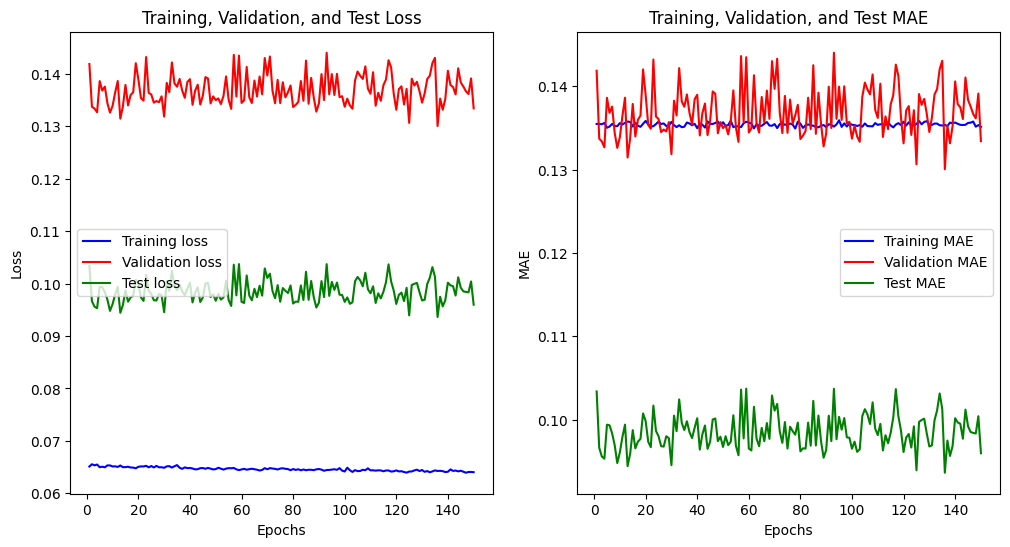

In [34]:
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Lists to store loss and MAE values
train_losses = []
val_losses = []
test_losses = []
train_maes = []
val_maes = []
test_maes = []

# Define the loss function and optimizer
criterion = nn.L1Loss()  # Define the loss function as MAE
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Callback
class MyCallback:
    def __init__(self):
        self.best_mae = float('inf')  # Initialize best MAE with infinity

    def on_epoch_end(self, epoch, mae, val_mae):
        if mae < 0.1 and val_mae < 0.1:
            print("\nMAE of the model < 10% of data scale")
            return True  # Stop training
        else:
            return False

callbacks = MyCallback()

import time
time_array = []

start_time = time.time()

# Training loop
for epoch in range(150):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    running_mae = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_mae += F.l1_loss(outputs, labels).item()

    # Compute MAE on validation set
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_mae = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            val_mae += F.l1_loss(outputs, labels).item()

    # Compute MAE on test set
    test_loss = 0.0
    test_mae = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            test_loss += criterion(outputs, labels).item()
            test_mae += F.l1_loss(outputs, labels).item()

    # Calculate average loss and MAE
    running_loss /= len(train_loader)
    running_mae /= len(train_loader)
    val_loss /= len(val_loader)
    val_mae /= len(val_loader)
    test_loss /= len(test_loader)
    test_mae /= len(test_loader)

    # Append values to lists for plotting
    train_losses.append(running_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    train_maes.append(running_mae)
    val_maes.append(val_mae)
    test_maes.append(test_mae)

    # Check if training should stop based on callback
    if callbacks.on_epoch_end(epoch, running_loss, val_loss):
        break

    print(f"Epoch [{epoch+1}/150], Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Val MAE: {val_mae:.4f}, Test MAE: {test_mae:.4f}")

print("--- %.2f minutes ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

# Plotting
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.plot(epochs, test_losses, 'g', label='Test loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_maes, 'b', label='Training MAE')
plt.plot(epochs, val_maes, 'r', label='Validation MAE')
plt.plot(epochs, test_maes, 'g', label='Test MAE')
plt.title('Training, Validation, and Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [35]:
torch.save(model.state_dict(), "Best_RNN_model.pth")